# **REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix 
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
plt.rcParams['font.size']=15
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=15)
plt.rcParams['text.color']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'

# DATA IMPORTATION

In [3]:
df=pd.read_csv('actual_data.csv')

# DATA EXPLORATION

In [4]:
df.head()

,Unnamed: 0,ph,Hardness,Conductivity,Turbidity,TC,portability
0,0,3.716080,129.422921,592.885359,4.500656,8391.0,0
1,1,8.099124,224.236259,418.606213,3.055934,5330.0,0
2,2,8.316766,214.373394,363.266516,4.628771,8443.0,0
3,3,9.092223,181.101509,398.410813,4.075075,5500.0,0
4,4,5.584087,188.313324,280.467916,2.559708,4049.0,0


In [5]:
df.shape

(1684, 7)

In [6]:
df.columns

Index(['Unnamed: 0', 'ph', 'Hardness', 'Conductivity', 'Turbidity', 'TC',
       'portability'],
      dtype='object')

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df[df['portability']==1].shape

(5, 6)

In [9]:
df.isnull().sum()

ph              0
Hardness        0
Conductivity    0
Turbidity       0
TC              0
portability     0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='ph', ylabel='Hardness'>

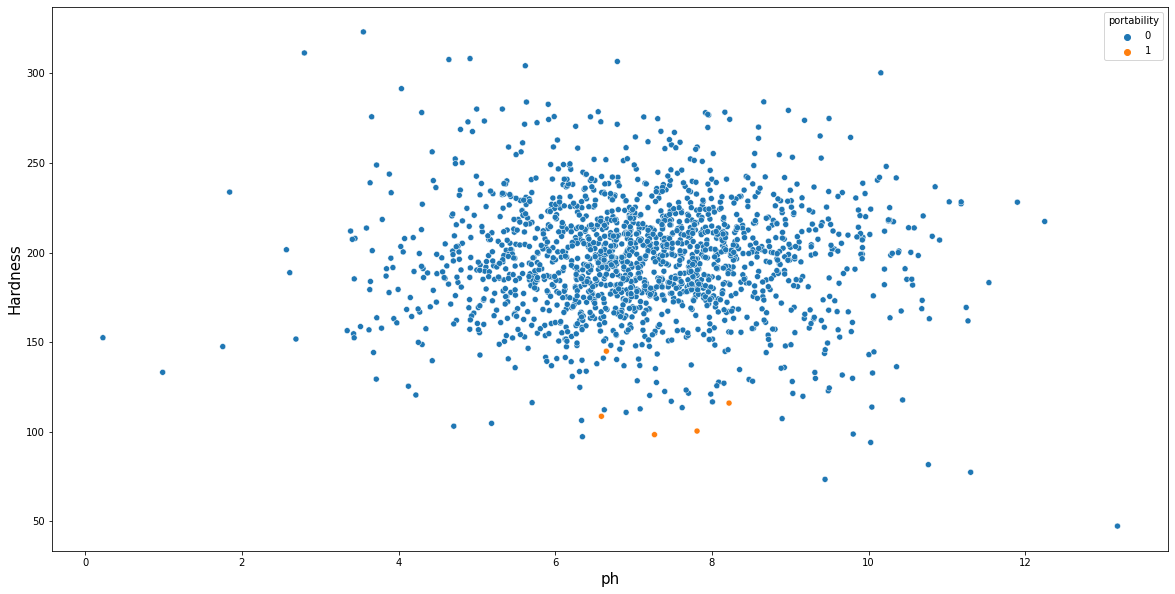

In [10]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='ph',y='Hardness',hue='portability')

<AxesSubplot:xlabel='TC', ylabel='Conductivity'>

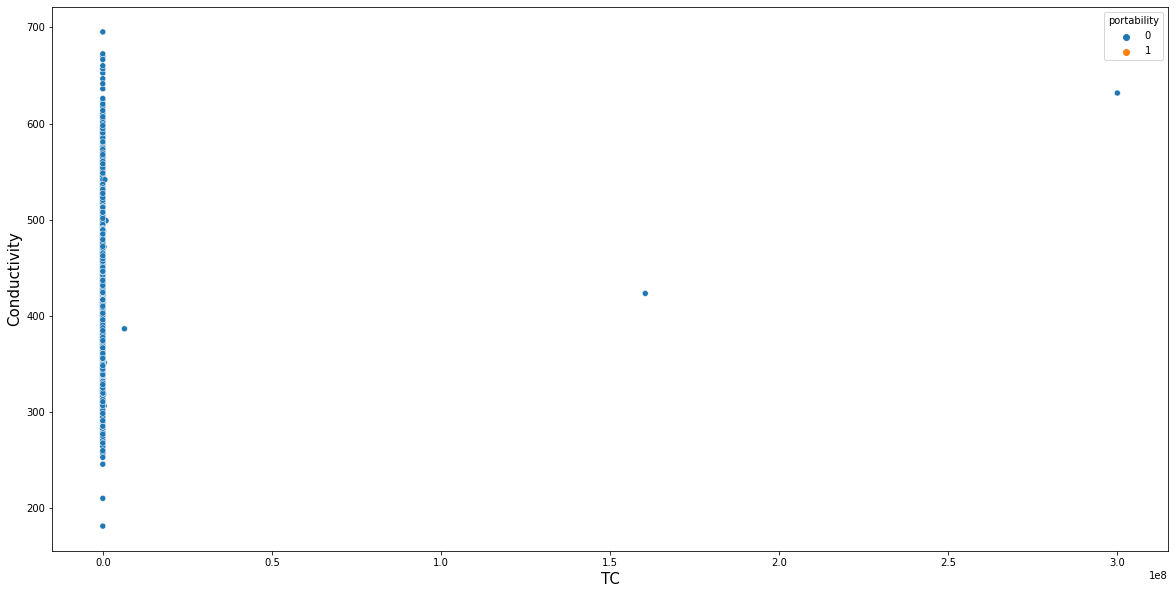

In [11]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='TC',y='Conductivity',hue='portability')

<AxesSubplot:>

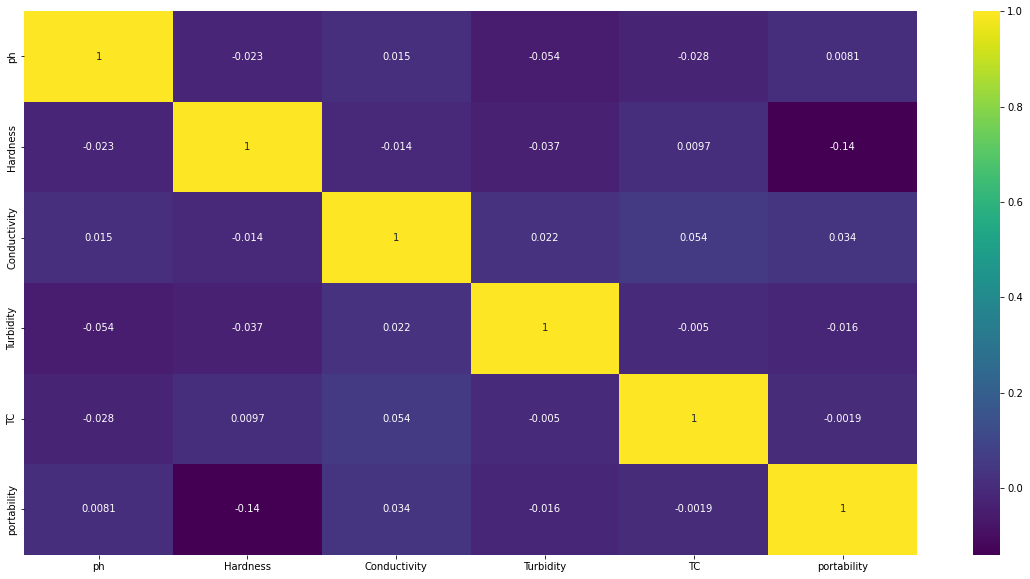

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:>

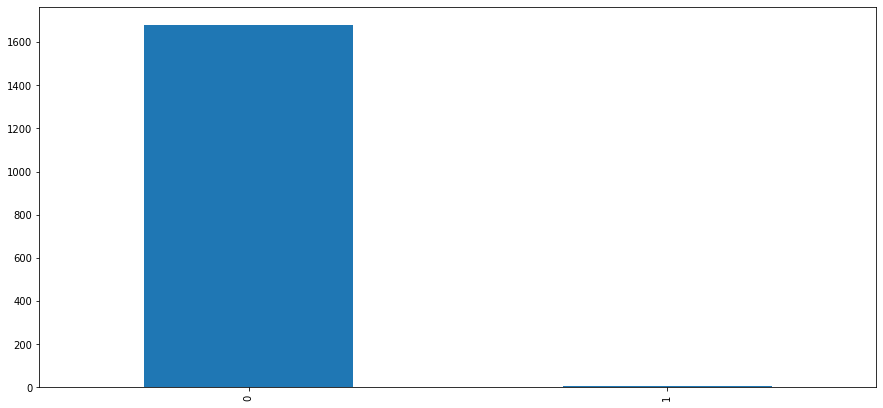

In [13]:
plt.figure(figsize=(15,7))
df['portability'].value_counts().plot.bar()

# DATA PROCESSING AND SPLITTING 

In [14]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [15]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
sc=StandardScaler()
x=sc.fit_transform(x)

In [16]:
df.tail()

,ph,Hardness,Conductivity,Turbidity,TC,portability
1679,6.266800,187.829617,277.050802,3.652845,205.0,0
1680,6.630252,160.920384,416.898071,5.181202,202.0,0
1681,6.775631,154.372543,597.979274,3.017544,315.0,0
1682,8.164992,278.340358,384.783185,4.162496,562.0,0
1683,7.773758,251.462844,355.831683,4.040974,546.0,0


# Data Balancing

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=4)
x1, y1= smote.fit_resample(x, y)


In [18]:
u,v=np.unique(y1,return_counts=True)
for x in range(len(u)):
  print(u[x],'=',v[x])

0 = 1679
1 = 1679


In [19]:
x1

array([[-2.23142125, -2.08151104,  2.0806439 ,  0.69976822, -0.03327114],
       [ 0.67216861,  0.86283564, -0.10954387, -1.12953047, -0.03364053],
       [ 0.81634745,  0.55655284, -0.80500474,  0.8619857 , -0.03326486],
       ...,
       [ 0.57592117, -2.80995914,  1.36240823, -1.0959585 , -0.03428373],
       [ 0.22813184, -2.95002396,  0.74704356,  1.11971023, -0.03428373],
       [ 0.72601498, -2.51812625, -0.19116421,  0.41338028, -0.03428373]])

# Data Splitting

In [20]:
x_train_resampled,x_test,y_train_resampled,y_test=train_test_split(x1,y1,test_size=.2,random_state=42)

# Model Development and Evaluation

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       356
           1       0.95      1.00      0.97       316

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



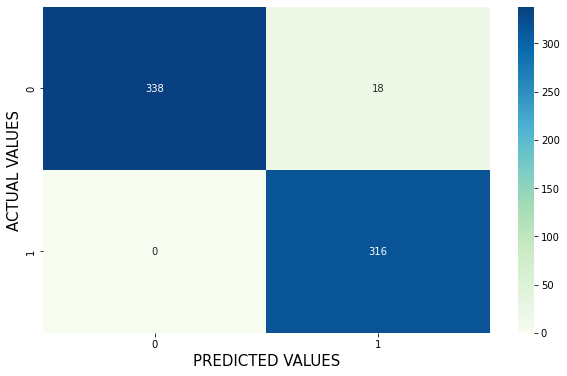

In [26]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(penalty='l2', C=1.0), n_estimators=900, random_state=42)
bagging_model.fit(x_train_resampled,y_train_resampled)
y_pred = bagging_model.predict(x_test)
print(classification_report(y_test,y_pred))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()


# Model Testing

In [27]:
test1=[3.716080,129.422921,592.885359,4.500656,8391.0]
test2=[7.266599,98.452931,502.883067,4.952733,0]
test3=[6.266800,187.829617,277.050802,3.652845,205.0]
test4=[7.809632,100.457615,605.220124,2.447444,0.0]
test5=[6.652488,145.010172,545.974994,3.742090,0.0]
print(bagging_model.predict(np.array([test1])))
print(bagging_model.predict(np.array([test2])))
print(bagging_model.predict(np.array([test3])))
print(bagging_model.predict(np.array([test4])))
print(bagging_model.predict(np.array([test5])))

[0]
[1]
[0]
[1]
[1]


# Model Exportation

In [29]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(bagging_model, file)
print('Done!!!')


Done!!!
